In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

### 7 fold cross validation

In [138]:
BIO = [0.0494326480170767, 0.921428571428571, 0.537305421363392, 0.987179487179487, 0.959444444444444, 0.712893659087699, 1]
BIO_EEG = [0.563027, 0.921429,0.730005, 0.987179,0.961667, 0.775385, 0.816502]
EEG = [0.72636815920398, 0.501041666666666, 0.651128139633886, 0.649166666666666, 0.367326732673267, 0.524648547328959, 0.208942836393816]

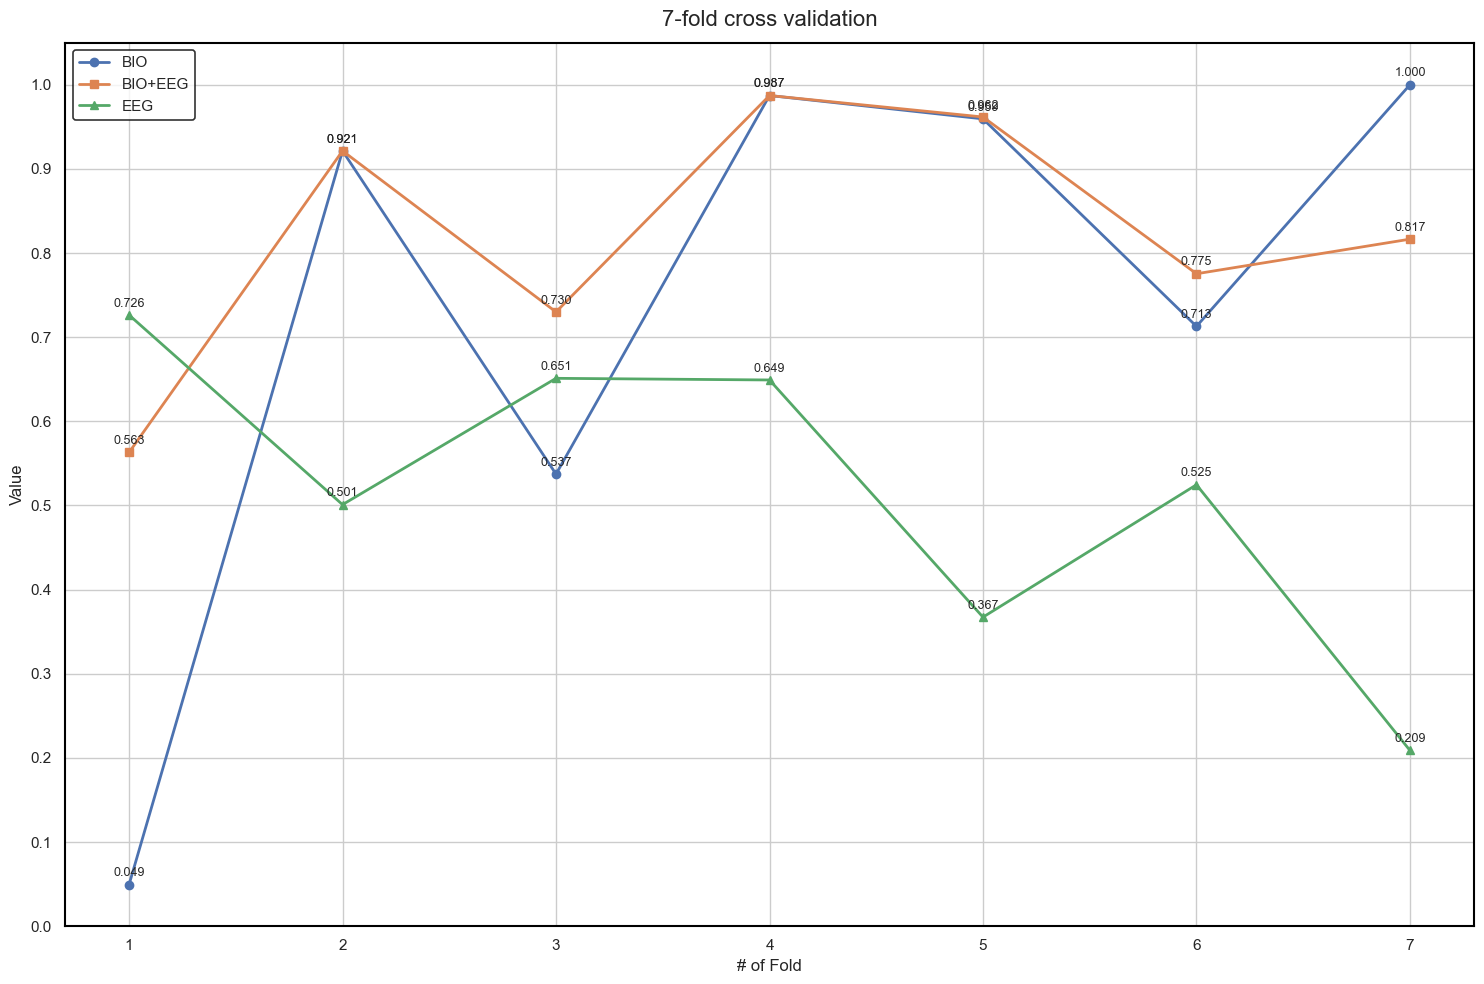

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


folds = np.arange(1, len(BIO) + 1)

plt.figure(figsize=(15, 10))
ax = plt.gca()

# --- plot with matplotlib only ---
line1, = ax.plot(folds, BIO, marker='o', linewidth=2, label='BIO')
line2, = ax.plot(folds, BIO_EEG, marker='s', linewidth=2, label='BIO+EEG')
line3, = ax.plot(folds, EEG, marker='^', linewidth=2, label='EEG')

# --- annotate each point with its value ---
def annotate_points(x, y):
    for xi, yi in zip(x, y):
        ax.annotate(f"{yi:.3f}", (xi, yi),
                    textcoords="offset points", xytext=(0, 6),
                    ha='center', fontsize=9)

annotate_points(folds, BIO)
annotate_points(folds, BIO_EEG)
annotate_points(folds, EEG)

# --- titles & axes ---
ax.set_title("7-fold cross validation", fontsize=16, pad=12)
ax.set_xlabel("# of Fold")
ax.set_ylabel("Value")

# y-axis: resolution 0.1
ax.set_ylim(0.0, 1.05)
ax.set_yticks(np.arange(0.0, 1.01, 0.1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# x-axis ticks at each fold
ax.set_xticks(folds)

# outer border in black
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(1.5)

# legend with black border
leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor("black")
leg.get_frame().set_linewidth(1.2)

ax.grid(True)
plt.tight_layout()
plt.savefig("fold_series_plot_matplotlib.png", dpi=200)
plt.show()


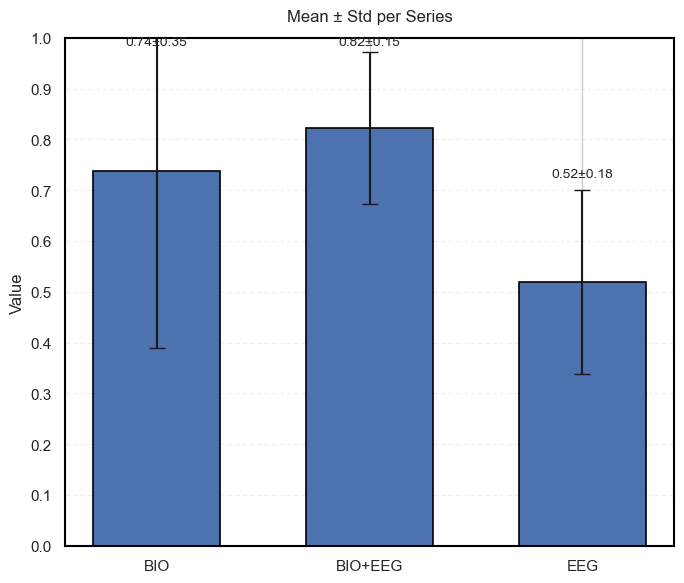

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# assumes BIO, BIO_EEG, EEG are already defined lists
labels = ["BIO", "BIO+EEG", "EEG"]
series = [BIO, BIO_EEG, EEG]

means = [np.mean(s) for s in series]
stds  = [np.std(s, ddof=1) for s in series]  # sample std

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(7, 6))
bars = ax.bar(x, means, yerr=stds, capsize=6, width=0.6,
              edgecolor="black", linewidth=1.2)

# y-axis: 0.1 resolution
ax.set_ylim(0, 1.0)
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Value")
ax.set_title("Mean ± Std per Series", pad=12)

# optional: light horizontal grid
ax.grid(axis="y", linestyle="--", alpha=0.3)

# black outer border
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(1.5)

# value labels above bars
for i, (m, s) in enumerate(zip(means, stds)):
    y = min(0.98, m + s + 0.02)
    ax.text(i, y, f"{m:.2f}±{s:.2f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.savefig("mean_std_bar_matplotlib.png", dpi=200)
plt.show()


### 14 fold cross validation

In [144]:
BIO_EEG = [0.919540, 0.515152, 0.752381, 1.000000, 1.000000, 0.999001, 0.866667, 1.000000, 1.000000, 0.850000, 0.315789, 1.000000, 0.000000, 1.000000]
BIO = [0.08045977011494254, 1.0, 0.8, 0.24489795918367352, 1.0, 0.038461538461538436, 0.0, 1.0, 1.0, 0.85, 0.0, 1.0, 0.0, 0.0]
EEG = [0.5142857142857143,
 0.27037037037037037,
 0.14705882352941177,
 0.6664086687306502,
 0.0,
 0.893028024606972,
 0.75,
 0.603448275862069,
 0.3564839934888768,
 1.0,
 0.07236842105263162,
 0.6269303201506591,
 0.3090909090909091,
 0.6053067993366501]

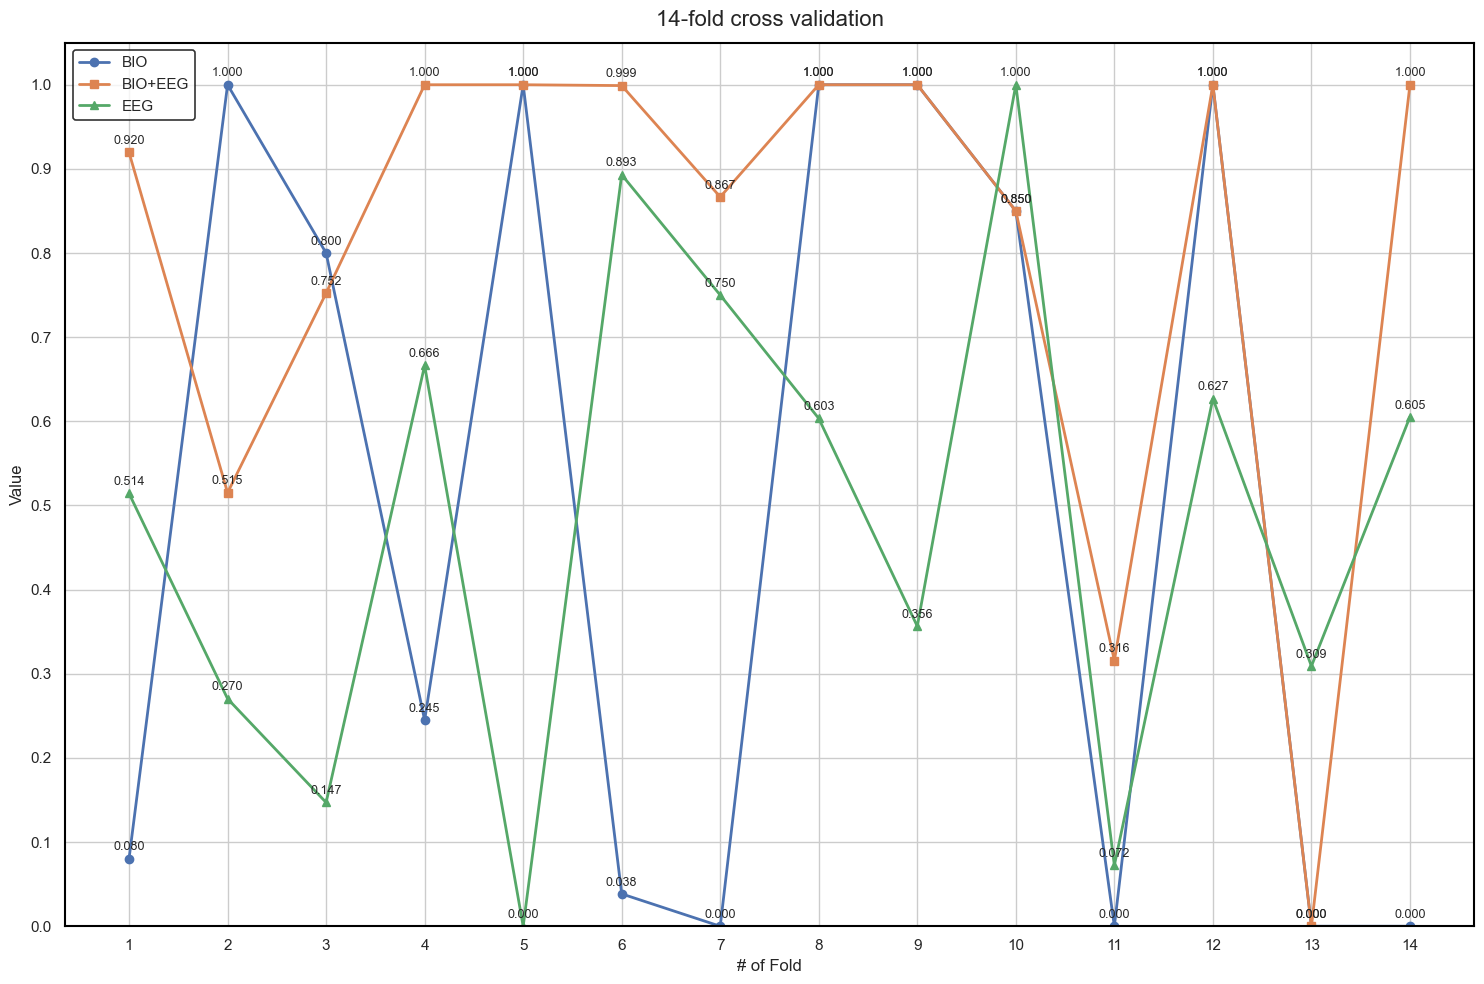

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

folds = np.arange(1, len(BIO) + 1)

plt.figure(figsize=(15, 10))
ax = plt.gca()

# --- plot with matplotlib only ---
line1, = ax.plot(folds, BIO, marker='o', linewidth=2, label='BIO')
line2, = ax.plot(folds, BIO_EEG, marker='s', linewidth=2, label='BIO+EEG')
line3, = ax.plot(folds, EEG, marker='^', linewidth=2, label='EEG')

# --- annotate each point with its value ---
def annotate_points(x, y):
    for xi, yi in zip(x, y):
        ax.annotate(f"{yi:.3f}", (xi, yi),
                    textcoords="offset points", xytext=(0, 6),
                    ha='center', fontsize=9)

annotate_points(folds, BIO)
annotate_points(folds, BIO_EEG)
annotate_points(folds, EEG)

# --- titles & axes ---
ax.set_title("14-fold cross validation", fontsize=16, pad=12)
ax.set_xlabel("# of Fold")
ax.set_ylabel("Value")

# y-axis: resolution 0.1
ax.set_ylim(0.0, 1.05)
ax.set_yticks(np.arange(0.0, 1.01, 0.1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# x-axis ticks at each fold
ax.set_xticks(folds)

# outer border in black
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(1.5)

# legend with black border
leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor("black")
leg.get_frame().set_linewidth(1.2)

ax.grid(True)
plt.tight_layout()
plt.savefig("fold_series_plot_matplotlib.png", dpi=200)
plt.show()


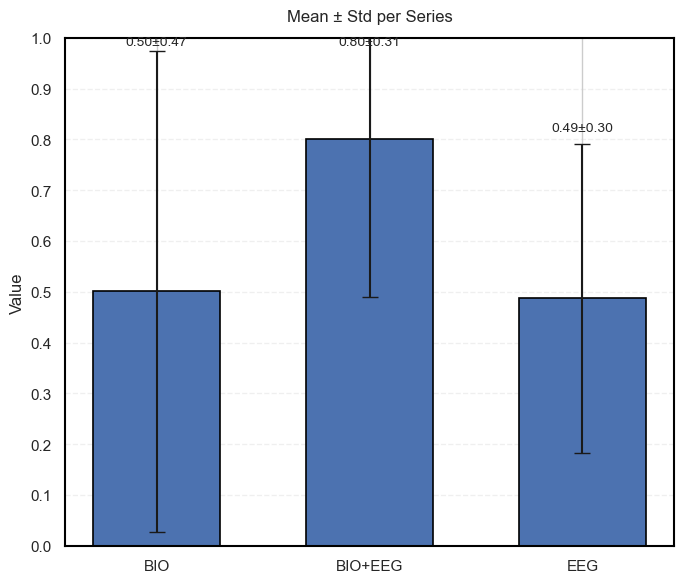

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# assumes BIO, BIO_EEG, EEG are already defined lists
labels = ["BIO", "BIO+EEG", "EEG"]
series = [BIO, BIO_EEG, EEG]

means = [np.mean(s) for s in series]
stds  = [np.std(s, ddof=1) for s in series]  # sample std

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(7, 6))
bars = ax.bar(x, means, yerr=stds, capsize=6, width=0.6,
              edgecolor="black", linewidth=1.2)

# y-axis: 0.1 resolution
ax.set_ylim(0, 1.0)
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Value")
ax.set_title("Mean ± Std per Series", pad=12)

# optional: light horizontal grid
ax.grid(axis="y", linestyle="--", alpha=0.3)

# black outer border
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(1.5)

# value labels above bars
for i, (m, s) in enumerate(zip(means, stds)):
    y = min(0.98, m + s + 0.02)
    ax.text(i, y, f"{m:.2f}±{s:.2f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.savefig("mean_std_bar_matplotlib.png", dpi=200)
plt.show()
